
# Importing necessary libraries

In [ ]:
import pandas as pd

import sqlite3
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

import matplotlib.pyplot as plt
%matplotlib inline

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())
import numpy as np
#table names - matches / teams / teams_in_matches / unique_teams
# table columns TeamName, Unique_Team_ID, Match_ID, Season, Date, HomeTeam, AwayTeam, FTHG, FTAG, FTR

In [76]:
#selecting the matches table
cur.execute("""SELECT * FROM matches""")

df_matches = pd.DataFrame(cur.fetchall())
df_matches.columns = [x[0] for x in cur.description]
df_matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [627]:
#selecting the teams table 
cur.execute("""SELECT * FROM teams""")

df_teams = pd.DataFrame(cur.fetchall())
df_teams.columns = [x[0] for x in cur.description]
df_teams.head()

,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [1014]:
#selecting the teams_in_matches table
cur.execute("""SELECT * FROM teams_in_matches""")

df_teams_in_matches = pd.DataFrame(cur.fetchall())
df_teams_in_matches.columns = [x[0] for x in cur.description]
df_teams_in_matches.head()

,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [1015]:
#selecting the unique_teams table
cur.execute("""SELECT * FROM unique_teams""")

df_unique_teams = pd.DataFrame(cur.fetchall())
df_unique_teams.columns = [x[0] for x in cur.description]
df_unique_teams.head()

,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


## We are able to create a table merging unique_teams, matches and unique_team_id using common variables

In [605]:
# creating a new data frame 'df' which merges the tables unique_teams, matches and unique_team_id
cur.execute("""SELECT * FROM unique_teams
            JOIN teams_in_matches
            USING (unique_team_id)
            JOIN matches
            USING (match_id)
            WHERE season == 2011
                        
            """)

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,TeamName,Unique_Team_ID,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Bayern Munich,1,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,Nurnberg,22,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
2,Bayern Munich,1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
3,Stuttgart,17,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
4,Bayern Munich,1,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A


In [638]:
#checking to see which Div the English teams are in, will filter out the english teams from dataframe
df.loc[:,'TeamName':'Div']

,TeamName,Unique_Team_ID,Match_ID,Div
0,Bayern Munich,1,1092,D1
1,Nurnberg,22,1092,D1
2,Bayern Munich,1,1093,D1
3,Stuttgart,17,1093,D1
4,Bayern Munich,1,1094,D1
5,Wolfsburg,7,1094,D1
6,Bayern Munich,1,1095,D1
7,Mainz,11,1095,D1
8,Bayern Munich,1,1096,D1
9,Freiburg,16,1096,D1


In [653]:
# E0 is the division for English teams
df['Div'].unique()

array(['D1', 'D2', 'E0'], dtype=object)

In [831]:
#will run the 3 table merge query using SQL filtering out E0
cur.execute("""SELECT * FROM unique_teams
            JOIN teams_in_matches
            USING (unique_team_id)
            JOIN matches
            USING (match_id)
            WHERE season == 2011
            AND Div != 'E0'
            """)

df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head()

,TeamName,Unique_Team_ID,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,Bayern Munich,1,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,Nurnberg,22,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
2,Bayern Munich,1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
3,Stuttgart,17,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
4,Bayern Munich,1,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A


In [834]:
# creating a new column in the dataframe 'df' using iterrows, this loop will create a new column
# 'outcome' assigning a W, L or D based on the match result
for i, row in df.iterrows():
    if row.TeamName == row.HomeTeam:
        if row.FTHG > row.FTAG:
            df.loc[i,'Outcome'] = 'W'
        elif row.FTHG < row.FTAG:
            df.loc[i,'Outcome'] = 'L'
        elif row.FTHG == row.FTAG:
            df.loc[i,'Outcome'] = 'D'
    elif row.TeamName == row.AwayTeam:
        if row.FTAG > row.FTHG:
            df.loc[i,'Outcome'] = 'W'
        elif row.FTAG < row.FTHG:
            df.loc[i,'Outcome'] = 'L'
        elif row.FTAG == row.FTHG:
            df.loc[i,'Outcome'] = 'D'
        
    

In [835]:
#checking to see if this worked
df.head()

,TeamName,Unique_Team_ID,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Outcome
0,Bayern Munich,1,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,W
1,Nurnberg,22,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,L
2,Bayern Munich,1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,W
3,Stuttgart,17,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,L
4,Bayern Munich,1,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,W


In [836]:
# this loop will create a new column on the data frame using iterrows.
#it compares the FTHG and FTAG columns, and based on this creates a new column total goal,
#which shows the total goals scored by the 'TeamName'
for i, row in df.iterrows():
    if row.TeamName == row.HomeTeam:
        df.loc[i,'Total_Goals_by_Team_Name'] = df.loc[i,'FTHG']
    else:
        df.loc[i,'Total_Goals_by_Team_Name'] = df.loc[i,'FTAG']

In [837]:
#checking to see if this worked
df.head()

,TeamName,Unique_Team_ID,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Outcome,Total_Goals_by_Team_Name
0,Bayern Munich,1,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,W,1.0
1,Nurnberg,22,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,L,0.0
2,Bayern Munich,1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,W,2.0
3,Stuttgart,17,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,L,1.0
4,Bayern Munich,1,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,W,1.0


In [838]:
# using pysql package to filter the df dataframe by TeamName, and taking an aggregate of the outcome
#column using a filter L, to indicate the team losses.
p = """SELECT TeamName, COUNT (Outcome) AS TotalLoss FROM df
        WHERE outcome = 'L'
        GROUP BY TeamName
        """
total_loss = pysqldf(p)
total_loss.set_index('TeamName', inplace=True)
total_loss.head()



,TotalLoss
TeamName,
Aachen,15
Augsburg,12
Bayern Munich,7
Bochum,17
Braunschweig,9


In [839]:
# using pysql package to filter the df dataframe by TeamName, and taking an aggregate of the outcome
#column using a filter W, to indicate the team wins.
q = """SELECT TeamName, COUNT (Outcome) AS TotalWins FROM df
        WHERE outcome = 'W'
        GROUP BY TeamName
        """
total_wins = pysqldf(q)
total_wins.set_index('TeamName', inplace=True)
total_wins.head()


,TotalWins
TeamName,
Aachen,6
Augsburg,8
Bayern Munich,23
Bochum,10
Braunschweig,10


In [840]:
# using pysql package to filter the df dataframe by TeamName, and taking an aggregate of the goals scored

z = """SELECT TeamName, SUM(Total_Goals_by_team_name) AS TotalGoals
        FROM df
        GROUP BY TeamName
        """
total_goals = pysqldf(z)
total_goals.set_index('TeamName', inplace=True)
total_goals.head()

,TotalGoals
TeamName,
Aachen,30.0
Augsburg,36.0
Bayern Munich,77.0
Bochum,41.0
Braunschweig,37.0


In [668]:
# using pysql package to filter the df dataframe by TeamName, and taking an aggregate of 
#total number of matches played by each team


y = """SELECT TeamName, COUNT(Match_ID) AS TotalMatches
        FROM df
        GROUP BY TeamName
        """
total_matches = pysqldf(y)
total_matches.set_index('TeamName', inplace=True)
total_matches.head()


,TotalMatches
TeamName,
Aachen,34
Augsburg,34
Bayern Munich,34
Bochum,34
Braunschweig,34


In [841]:
#joining the 3 dataframes together
df_joined = total_matches.join(total_wins).join(total_loss).join(total_goals)


In [842]:
df_joined.head()

,TotalMatches,TotalWins,TotalLoss,TotalGoals
TeamName,,,,
Aachen,34,6,15,30.0
Augsburg,34,8,12,36.0
Bayern Munich,34,23,7,77.0
Bochum,34,10,17,41.0
Braunschweig,34,10,9,37.0


In [843]:
#resetting the index column
df_joined.reset_index(inplace=True)

In [844]:
df_joined.head()

,TeamName,TotalMatches,TotalWins,TotalLoss,TotalGoals
0,Aachen,34,6,15,30.0
1,Augsburg,34,8,12,36.0
2,Bayern Munich,34,23,7,77.0
3,Bochum,34,10,17,41.0
4,Braunschweig,34,10,9,37.0


In [845]:
df.head()

,TeamName,Unique_Team_ID,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Outcome,Total_Goals_by_Team_Name
0,Bayern Munich,1,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,W,1.0
1,Nurnberg,22,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,L,0.0
2,Bayern Munich,1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,W,2.0
3,Stuttgart,17,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,L,1.0
4,Bayern Munich,1,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,W,1.0


In [907]:
# the df dataframe has 1224 rows, the API allows 1000 queries per date, will need to reduce
#number of rows from the dataframe. As the table joins in df created 2 entries per match,
#df2 is a new data frame, using just the matches table from the SQL database to assign a
#weather table indicating whether it rained or not

cur.execute("""SELECT * FROM matches
            WHERE season == 2011
            AND Div != 'E0'
                        
            """)

df2 = pd.DataFrame(cur.fetchall())
df2.columns = [x[0] for x in cur.description]
df2.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [1016]:
# the table has 612 rows now
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 12 columns):
Match_ID     612 non-null int64
Div          612 non-null object
Season       612 non-null int64
Date         612 non-null datetime64[ns]
HomeTeam     612 non-null object
AwayTeam     612 non-null object
FTHG         612 non-null int64
FTAG         612 non-null int64
FTR          612 non-null object
Date Unix    612 non-null int64
Weather      612 non-null float64
Winner       612 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 57.5+ KB


In [910]:
# the API will require a time to run the query, the time needs to be in UNIX, converting the
#date column into datetime format
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m/%d')

In [911]:
#now that we have the date column in date time format, this will convert it into UNIX and 
#create a new column 'Date Unix'
df2['Date Unix'] = df2['Date'].astype(np.int64) // 10**9

In [912]:
#checking to see if this worked
df2.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Date Unix
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1333152000
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1323561600
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1313193600
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,1322352000
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,1329523200


In [913]:
df2['Date Unix'][0]

1333152000

# API

In [914]:
# creating a function which will assign the api key from the .secret folder saved on computer
def get_keys(path):
    with open(path) as f:
        return json.load(f)

In [915]:
# assigning 
keys = get_keys("/Users/naweedahmed/.secret/darksky_api.json")

api_key = keys['api_key']

In [ ]:
#importing requests and then defining variables which will go into the URL string
import requests
latitude = 52.52 #latitude for berlin
longitude = 13.4050 #longitude for berlin
url = 'https://api.darksky.net/forecast/'
exclude = '?exclude=currently,minutely,hourly,alerts,flags' #exclude fields

#this function will iterate over each row on df2 dataframe, and run the request based on the
#url string we have defined. I have defined the url using string.format, assigning the
#variables we want.
#additionally, the function will take the json response and pull out the api request under "icon"
#and create a new column on dataframe df2, and assign the value from the API request to each row
for i, rows in df2.iterrows():
    date = df2.loc[i,"Date Unix"]
    response = requests.get('{}{}/{},{},{}{}'.format(url, api_key, latitude, longitude, date, exclude)  )  
    weather = response.json()['daily']['data'][0].get("icon",0)
    df2.loc[i,"Weather"] = weather

print(response)
print(type(response.text))
print(response.text[:1000])

In [929]:
#creating a new column determining the winner in each match
for i, row in df2.iterrows():
    if row.FTR == "H":
        df2.loc[i,'Winner'] = df2.loc[i,"HomeTeam"]
    elif row.FTR == "A":
        df2.loc[i,'Winner'] = df2.loc[i,"AwayTeam"]
    else:
        df2.loc[i,'Winner'] = "Draw"

In [930]:
df2.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Date Unix,Weather,Winner
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1333152000,rain,Bayern Munich
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1323561600,partly-cloudy-day,Bayern Munich
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1313193600,partly-cloudy-day,Bayern Munich
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,1322352000,wind,Mainz
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,1329523200,partly-cloudy-day,Draw


In [931]:
# checking to see the unique values in the "Weather Column"
df2['Weather'].unique()

array(['rain', 'partly-cloudy-day', 'wind', 0, 'clear-day', 'cloudy', nan],
      dtype=object)

In [932]:
#checking to see how many null values
df2['Weather'].isna().sum()

3

In [ ]:
# replacing everything that does not have rain with 0, and rain entry as 1
df2['Weather'] = df2['Weather'].replace({'rain': 1, 'partly-cloudy-day' : 0, 'wind' : 0, 'clear-day' : 0, 'cloudy':0})

In [943]:
#replacing the null values with 0
df2['Weather'].fillna(value =0, inplace=True)

In [945]:
#checking to see if null values were removed
df2['Weather'].isna().sum()

0

In [946]:
#checking to see what the df2 looks like
df2.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Date Unix,Weather,Winner
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A,1333152000,1.0,Bayern Munich
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A,1323561600,0.0,Bayern Munich
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,1313193600,0.0,Bayern Munich
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H,1322352000,0.0,Mainz
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D,1329523200,0.0,Draw


In [955]:
#using pysql to create a new datafram rain_days, summing the rainydays variables, and grouping
#by winner

rain = """SELECT Winner, COUNT(Weather) AS RainyDays
        FROM df2
        WHERE Weather == 1
        GROUP BY Winner
        
        """
rain_days = pysqldf(rain)
rain_days


,Winner,RainyDays
0,Aachen,2
1,Augsburg,3
2,Bayern Munich,5
3,Bochum,2
4,Braunschweig,4
5,Cottbus,2
6,Dortmund,5
7,Draw,39
8,Dresden,3
9,Duisburg,1


In [956]:
#the rain_days dataframe has some entries as Draw, filtering this out
rain_days = rain_days[rain_days['Winner'] != 'Draw']

In [959]:
#renaming the "Winner" column as "TeamName"
rain_days.rename(columns = {"Winner":"TeamName"}, inplace=True)

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [960]:
# joining the rain_days dataframe to df_joined2 dataframe
df_joined2 = pd.merge(df_joined, rain_days, on='TeamName' )

# Final DataFrame with all requested information

In [961]:
#checking to see if this is okay
df_joined2.head()

,TeamName,TotalMatches,TotalWins,TotalLoss,TotalGoals,RainyDays
0,Aachen,34,6,15,30.0,2
1,Augsburg,34,8,12,36.0,3
2,Bayern Munich,34,23,7,77.0,5
3,Bochum,34,10,17,41.0,2
4,Braunschweig,34,10,9,37.0,4


In [965]:
# creatinng a new column on the df_joined2 dataframe, running a calculation to see % of wins
#on rain days
df_joined2['% Wins/Rain'] = (df_joined2['RainyDays'] / df_joined2['TotalWins']) * 100

In [966]:
#checking to see if this is okay
df_joined2.head()

,TeamName,TotalMatches,TotalWins,TotalLoss,TotalGoals,RainyDays,% Wins/Rain
0,Aachen,34,6,15,30.0,2,33.333333
1,Augsburg,34,8,12,36.0,3,37.500000
2,Bayern Munich,34,23,7,77.0,5,21.739130
3,Bochum,34,10,17,41.0,2,20.000000
4,Braunschweig,34,10,9,37.0,4,40.000000


# Visualisation of the TeamName vs TotalWins and TotalLosses

Text(0.5, 1.0, 'Total Wins / Losses For Each Team')

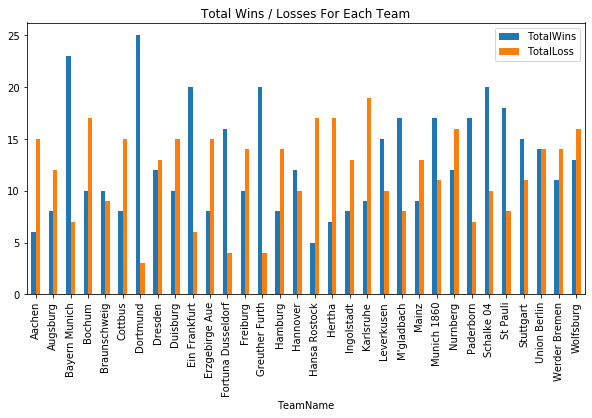

In [980]:
#creating a visualisation as barchart, plotting the TeamName column as x axis and then
# plotting the TotalWins and TotalLoss per team
df_joined2[['TeamName','TotalWins','TotalLoss']].plot(kind='bar', figsize=(10,5), x='TeamName' )
plt.title("Total Wins / Losses For Each Team")

# Loading the Data onto MongoDB

In [981]:
# converting the df_joined2 dataframe into a dictionary
df_joined2_dict = df_joined2.to_dict(orient ='records')

In [982]:
#checking to see if the dictonary was created properly
df_joined2_dict

[{'TeamName': 'Aachen',
  'TotalMatches': 34,
  'TotalWins': 6,
  'TotalLoss': 15,
  'TotalGoals': 30.0,
  'RainyDays': 2,
  '% Wins/Rain': 33.33333333333333},
 {'TeamName': 'Augsburg',
  'TotalMatches': 34,
  'TotalWins': 8,
  'TotalLoss': 12,
  'TotalGoals': 36.0,
  'RainyDays': 3,
  '% Wins/Rain': 37.5},
 {'TeamName': 'Bayern Munich',
  'TotalMatches': 34,
  'TotalWins': 23,
  'TotalLoss': 7,
  'TotalGoals': 77.0,
  'RainyDays': 5,
  '% Wins/Rain': 21.73913043478261},
 {'TeamName': 'Bochum',
  'TotalMatches': 34,
  'TotalWins': 10,
  'TotalLoss': 17,
  'TotalGoals': 41.0,
  'RainyDays': 2,
  '% Wins/Rain': 20.0},
 {'TeamName': 'Braunschweig',
  'TotalMatches': 34,
  'TotalWins': 10,
  'TotalLoss': 9,
  'TotalGoals': 37.0,
  'RainyDays': 4,
  '% Wins/Rain': 40.0},
 {'TeamName': 'Cottbus',
  'TotalMatches': 34,
  'TotalWins': 8,
  'TotalLoss': 15,
  'TotalGoals': 30.0,
  'RainyDays': 2,
  '% Wins/Rain': 25.0},
 {'TeamName': 'Dortmund',
  'TotalMatches': 34,
  'TotalWins': 25,
  'Total

In [983]:
#importing pymongo
import pymongo


myclient = pymongo.MongoClient('mongodb://localhost:27017')
mydb = myclient['lab_db']

In [984]:
#creating a collection under mydb
mycollection = mydb['lab_collection']

In [985]:
#inserting the df_joined2_dict into mongo
insertion_results = mycollection.insert_many(df_joined2_dict)

In [986]:
#checking the results to see if the dictionary was loaded
insertion_results.inserted_ids

[ObjectId('5e34263a14f88276f09ae222'),
 ObjectId('5e34263a14f88276f09ae223'),
 ObjectId('5e34263a14f88276f09ae224'),
 ObjectId('5e34263a14f88276f09ae225'),
 ObjectId('5e34263a14f88276f09ae226'),
 ObjectId('5e34263a14f88276f09ae227'),
 ObjectId('5e34263a14f88276f09ae228'),
 ObjectId('5e34263a14f88276f09ae229'),
 ObjectId('5e34263a14f88276f09ae22a'),
 ObjectId('5e34263a14f88276f09ae22b'),
 ObjectId('5e34263a14f88276f09ae22c'),
 ObjectId('5e34263a14f88276f09ae22d'),
 ObjectId('5e34263a14f88276f09ae22e'),
 ObjectId('5e34263a14f88276f09ae22f'),
 ObjectId('5e34263a14f88276f09ae230'),
 ObjectId('5e34263a14f88276f09ae231'),
 ObjectId('5e34263a14f88276f09ae232'),
 ObjectId('5e34263a14f88276f09ae233'),
 ObjectId('5e34263a14f88276f09ae234'),
 ObjectId('5e34263a14f88276f09ae235'),
 ObjectId('5e34263a14f88276f09ae236'),
 ObjectId('5e34263a14f88276f09ae237'),
 ObjectId('5e34263a14f88276f09ae238'),
 ObjectId('5e34263a14f88276f09ae239'),
 ObjectId('5e34263a14f88276f09ae23a'),
 ObjectId('5e34263a14f882

In [991]:
#running a query to see if the dictionary loaded correctly
query_1 = mycollection.find({'TeamName': 'Wolfsburg'})
for item in query_1:
    print(item)

{'_id': ObjectId('5e34263a14f88276f09ae241'), 'TeamName': 'Wolfsburg', 'TotalMatches': 34, 'TotalWins': 13, 'TotalLoss': 16, 'TotalGoals': 47.0, 'RainyDays': 4, '% Wins/Rain': 30.76923076923077}


In [1008]:
#assinging the saved visualisation to the variable Image
Image = '/Users/naweedahmed/Desktop/flatiron_project_mod_2/Screenshot 2020-01-31 at 13.12.27.png'

In [1009]:
#opening the image as bytestring, and saving it as img
with open(Image, "rb") as imageFile:
    img = imageFile.read()

In [1010]:
img

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\xf4\x00\x00\x03h\x08\x06\x00\x00\x00G\xba\xb4\xd9\x00\x00\x0cIiCCPICC Profile\x00\x00H\x89\x95W\x07XS\xc9\x16\x9e[RIh\x81\x08H\t\xbd\x89"\xbdH\t\xa1E\x10\x90*\xd8\x08I \xa1\xc4\x98\x10D\xec\xc8\xb2\n\xae]D@]\xd1U\x11\x17]\x0b k\xc5^\x16\xc5\xde\x1f\x8a\xa8\xac\xac\x8b\x05\x1b*oR@W\xbf\xf7\xde\xf7\xce\xf7\xcd\xbd\x7f\xce\x9c\xf3\x9fr\xe7\xde\xcc\x00\xa0S\xc3\x93JsQ]\x00\xf2$\xf9\xb2\xf8\x88\x10\xd6\x84\xd44\x16\xe9\x11@\x00\x06\x98\x80\x0c\xccx|\xb9\x94\x1d\x17\x17\r\xa0\x0c\xde\xff)o\xaeCk(W\\\x94\\\xdf\xcf\xffW\xd1\x13\x08\xe5|\x00\x908\x883\x04r~\x1e\xc4\xfb\x00\xc0K\xf8RY>\x00D\x1f\xa8\xb7\x9e\x91/U\xe2I\x10\x1b\xc8`\x82\x10K\x958K\x8dK\x948C\x8d+U6\x89\xf1\x1c\x88w\x02@\xa6\xf1x\xb2,\x00\xb4\x9b\xa1\x9eU\xc0\xcf\x82<\xda7!v\x95\x08\xc4\x12\x00t\xc8\x10\x07\xf2E<\x01\xc4\x91\x10\x8f\xc8\xcb\x9b\xa6\xc4\xd0\x0e8d|\xc5\x93\xf5\x0f\xce\x8c!N\x1e/k\x08\xabkQ\t9T,\x97\xe6\xf2f\xfe\x9f\xed\xf8\xdf\x92\x97\xab\x18\x8ca\x07\x07M$\x8b\x8cW\xd

In [1012]:
#loading the image bytestring onto the mongodb
imagedict = {'a': 4, 'image': img}
mycollection.insert_one(imagedict)